# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
# ensures plots are inlined for the notebook presentation
%matplotlib inline 
import scipy as sp
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from IPython.display import display
import seaborn as sns

# Create data set

In [2]:
# Create a data set of 10 rows and 4 columns (x) as input
X_testDataset = pd.read_csv('C:/Users/kpfeif200/OneDrive - Comcast/VI Admin/SJU/DSS 740 Analytics w Machine Learning/Module 2 Characteristics of ML/X_testDataset.csv')
#X_testDataset.describe()
X_testDataset.head()

,X_1,X_2,X_3,X_4
0,6,8,6,8
1,2,4,6,6
2,8,8,4,2
3,8,5,7,10
4,6,4,8,6


In [3]:
# Create a data set of 10 rows and 1 column output (y) 
y_testDataset = pd.read_csv('C:/Users/kpfeif200/OneDrive - Comcast/VI Admin/SJU/DSS 740 Analytics w Machine Learning/Module 2 Characteristics of ML/y_testDataset.csv')
#y_testDataset.describe()
y_testDataset.head()


,y_target
0,55
1,20
2,85
3,65
4,45


# Split data set into test/train with shuffle as True

In [4]:
# Define X and y variables and target values
X = X_testDataset[['X_1', 'X_2', 'X_3', 'X_4']].values
y = y_testDataset[['y_target']].values

# Split the data set into 1/5th (.2) test sample and 4/5th (.8) train sample.
# Setting shuffle to True
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321, shuffle = True)
print("y_train:\n{}".format(y_train))
print("y_test:\n{}".format(y_test))

y_train:
[[60]
 [65]
 [35]
 [85]
 [55]
 [20]
 [95]
 [45]]
y_test:
[[70]
 [65]]


#  Split data set into test/train with shuffle as False

In [5]:
#  Display all the train and test data with and without shuffle

# Split the data set into 1/5th (.2) test sample and 4/5th (.8) train sample.
# Setting shuffle to False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321, shuffle = False)
print("y_train:\n{}".format(y_train))
print("y_test:\n{}".format(y_test))

y_train:
[[55]
 [20]
 [85]
 [65]
 [45]
 [70]
 [35]
 [60]]
y_test:
[[95]
 [65]]


# Visualize Boston Housing data

In [6]:
# Fetch Boston Housing data
from sklearn.datasets import load_boston

#boston = load_boston(data_home=None, download_if_missing=True, return_X_y=False)
boston = load_boston()
print(f"type(boston.data) = {type(boston.data)}\n\tboston.data.shape={boston.data.shape}") #506 rows and 13 columns
print(f"type(boston.target) = {type(boston.target)}\n\tboston.target.shape={boston.target.shape}") #506 rows
print(f"type(boston.feature_names) = {type(boston.feature_names)}\n\tboston.feature_names.shape={boston.feature_names.shape}") #13 columns

print("Keys of boston:\n", boston.keys())
print("Feature names:\ n", boston['feature_names'])

# Create Pandas DataFrame
y = pd.DataFrame(boston.target, columns=['Target'])
boston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_Allpd = pd.concat([y, boston_pd], axis=1)
boston_Allpd.head()

type(boston.data) = <class 'numpy.ndarray'>
	boston.data.shape=(506, 13)
type(boston.target) = <class 'numpy.ndarray'>
	boston.target.shape=(506,)
type(boston.feature_names) = <class 'numpy.ndarray'>
	boston.feature_names.shape=(13,)
Keys of boston:
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Feature names:\ n ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,Target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C07E5956A0>]],
      dtype=object)

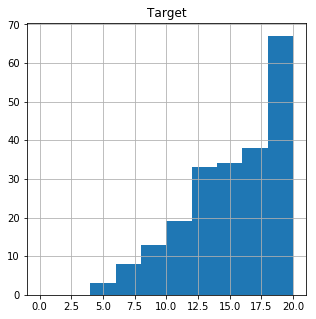

In [7]:
# visualize with histogram
boston_Allpd.hist('Target', bins=10, range=(0,20), figsize=(5,5))

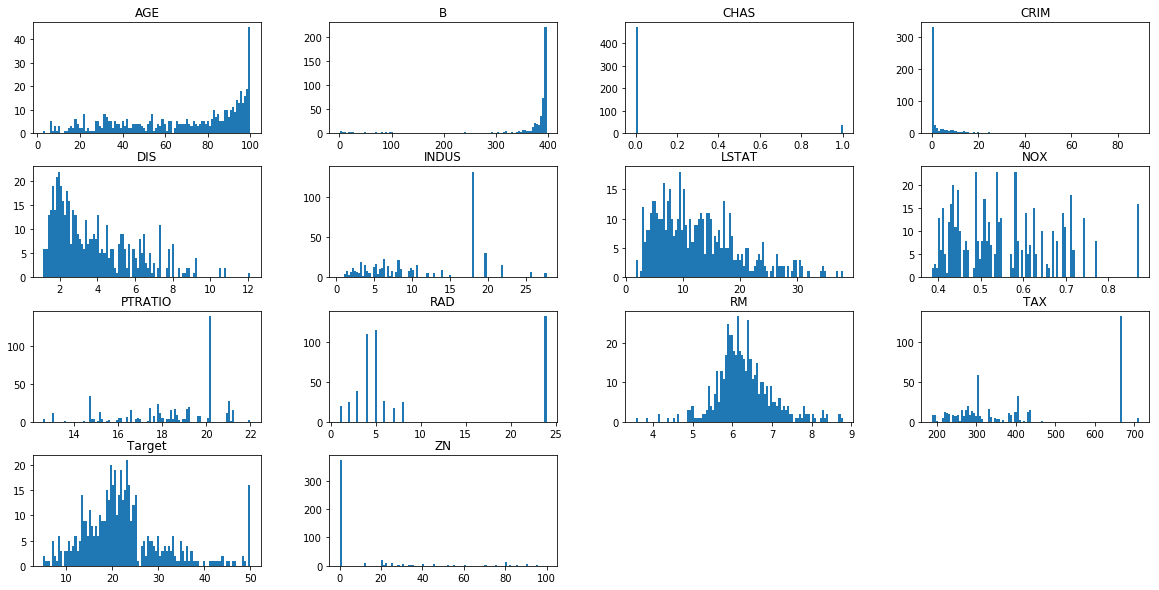

In [8]:
# create histograms
plt.figure(figsize=(20,10))
boston_Allpd.hist(figsize=(20,10), bins=100, grid=False)
plt.show()

# Create Boston Housing Linear Regression Model

In [9]:
# Define X and y variables and target values
X = boston_Allpd[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B' ,'LSTAT']]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# create y as series
y = boston_Allpd['Target']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Target, dtype: float64

In [17]:
# Create split - test set is 1/3 and train set is 2/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=321)

# Import linear model from sklearn
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

# This results in creating a linear fit.  We can then make a prediction using the test set
y_pred = regressor.predict(X_test)

print(type(y_pred))
print(y_pred.shape)
print(type(y_test.values))
print(y_test.values.shape)
print("Test set predictions:\n", y_pred)

<class 'numpy.ndarray'>
(167,)
<class 'numpy.ndarray'>
(167,)
Test set predictions:
 [17.1627742  20.93810959  6.70018804 14.31815174 15.84344552 20.69578868
 41.26325498 13.73827605 13.94592341 13.9179681  19.73163942 27.01390489
 21.48550131 20.64250182 38.74359047 16.30381544 29.59667631 28.32790138
 16.3892226  33.96813318 22.98156236 15.67394698 25.09985201 21.04802284
 37.877475   24.2397766  25.334236   24.72201198 14.67977668 12.19023201
 17.33160211 15.53695096  7.38971412 40.47276536 19.53432517 20.07843615
 17.72694271 21.75232558 20.61504649 39.76770849 20.5187928  22.57413491
 32.58920097 28.98415104  9.80420033 31.85315725 21.13448257 24.24880143
 33.34656176 30.95187076 23.89389729 18.04382731 21.23080268 17.69399158
 21.63950613 29.09999364 19.3164183  15.78279339 18.60352311 14.12623546
 28.87232596 27.40452518 20.2867046  16.26947292 33.9487731  26.54642195
 19.64513846 28.776681   18.24839215 41.84755781 27.77214746 18.90703699
 36.26679556 18.77078165 29.62555809 35

In [12]:
# Computing the test set accuracy using score method
print("Test set score: {:.2f}".format(regressor.score(X_test, y_test))) #<--returns a medium-low score

Test set score: 0.74


In [13]:
# Computing the test set accruacy using mean method
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test))) #<--not sure why this returns zero

Test set score: 0.00


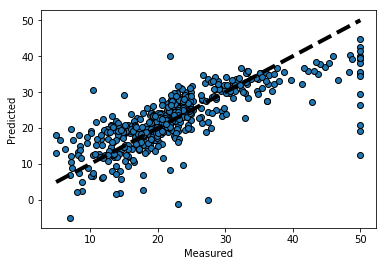

In [14]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regressor, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [15]:
# calculate MSE
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test.values, y_pred))

20.77814168241871
